#### 아래 데이터는 2019년 4월 1일부터 15일까지 모바일 웹 사용자 패널의 로그기록이다. 아래 과정에 따라 분석을 진행하시오.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./data/xView_201904_01_15.csv")

#### 1. Time Stamp 변수를 timestamp 형식으로 변환하고 데이터가 포함하고 있는 최소 날짜시간과 최대 날짜시간을 프린트 하시오. 요일변수와 시간대 변수를 생성하시오.

In [5]:
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])

In [6]:
data['Time Stamp'].min(),data['Time Stamp'].max()

(Timestamp('2019-04-01 00:00:00'), Timestamp('2019-04-15 23:59:58'))

In [7]:
print('최소 날짜시간:',data['Time Stamp'].min(),', 최대 날짜시간:',data['Time Stamp'].max())

최소 날짜시간: 2019-04-01 00:00:00 , 최대 날짜시간: 2019-04-15 23:59:58


In [8]:
data['Weekday']=data['Time Stamp'].dt.weekday

In [9]:
data['Hour']=data['Time Stamp'].dt.hour

In [10]:
data.head()

,KMID,Time Stamp,URL,Full Title,Weekday,Hour
0,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13
1,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12
2,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15
3,KM00002,2019-04-02 15:27:34,https://papago.naver.com/,Papago,1,15
4,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12


#### 2. 모바일 웹사용자 행태 분석 시 Session을 20분 이내에 이루어진 연속적인 클릭(탭)으로 정의하자. 각 로그가 새로운 세션인지 여부를  `NewSession` 변수에 True/False로 기록하시오. 그리고 `NewSession` 변수를 `cumsum`을 통해 `SessionID`를 생성하시오.

In [11]:
data['Time Stamp'].diff()

0                    NaT
1        0 days 23:00:50
2        0 days 03:16:53
3        0 days 00:00:13
4        0 days 20:35:38
               ...      
935409   0 days 00:00:57
935410   0 days 00:00:36
935411   1 days 02:30:22
935412   0 days 00:00:54
935413   0 days 00:00:56
Name: Time Stamp, Length: 935414, dtype: timedelta64[ns]

In [12]:
data['NewSession']=data['Time Stamp'].diff() > pd.Timedelta(minutes=20)
#Timestamp 시각, Timedelta 시간

In [14]:
data['SessionID']=data['NewSession'].cumsum()

In [15]:
data['SessionID']

0             0
1             1
2             2
3             2
4             3
          ...  
935409    87332
935410    87332
935411    87333
935412    87333
935413    87333
Name: SessionID, Length: 935414, dtype: int32

첫번째 접속한 것만 남기기

In [24]:
data_session=data.groupby('SessionID').first()

In [25]:
data_session.head()

,KMID,Time Stamp,URL,Full Title,Weekday,Hour,NewSession
SessionID,,,,,,,
0,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13,False
1,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12,True
2,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15,True
3,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12,True
4,KM00002,2019-04-03 12:25:58,https://m.search.naver.com/search.naver?query=...,회송행 : 네이버 통합검색,2,12,True


#### 3. SessionID 별로 체류시간(`SessionTime`)을 집계하여 (단위:초) 새로운 데이터프레임을 생성하시오. 

In [26]:
data_session['SessionTime'] = data.groupby('SessionID')['Time Stamp'].max() - data.groupby('SessionID')['Time Stamp'].min()

In [27]:
data_session.head()

,KMID,Time Stamp,URL,Full Title,Weekday,Hour,NewSession,SessionTime
SessionID,,,,,,,,
0,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13,False,0 days 00:00:00
1,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12,True,0 days 00:00:00
2,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15,True,0 days 00:00:13
3,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12,True,0 days 00:00:00
4,KM00002,2019-04-03 12:25:58,https://m.search.naver.com/search.naver?query=...,회송행 : 네이버 통합검색,2,12,True,0 days 00:00:00


In [28]:
data_session['SessionTime']=data_session['SessionTime'].dt.total_seconds()

In [29]:
data_session.head()

,KMID,Time Stamp,URL,Full Title,Weekday,Hour,NewSession,SessionTime
SessionID,,,,,,,,
0,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13,False,0.0
1,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12,True,0.0
2,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15,True,13.0
3,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12,True,0.0
4,KM00002,2019-04-03 12:25:58,https://m.search.naver.com/search.naver?query=...,회송행 : 네이버 통합검색,2,12,True,0.0


#### 4. 요일별 세션당 체류시간의 평균을 집계하고 bar graph로 나타내시오. 

<AxesSubplot:xlabel='Weekday'>

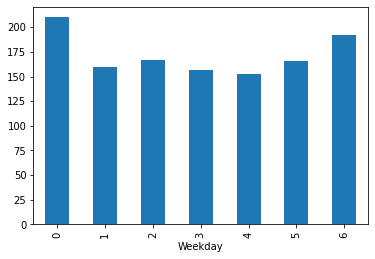

In [25]:
data_session.groupby('Weekday')['SessionTime'].median().plot.bar()

<AxesSubplot:xlabel='Weekday'>

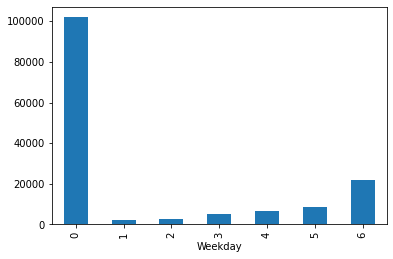

In [26]:
data_session.groupby('Weekday')['SessionTime'].mean().plot.bar()

#### 5. 시간대 별 쳬류시간의 평균을 집계하고 bar graph로 나타내시오. 

<AxesSubplot:xlabel='Hour'>

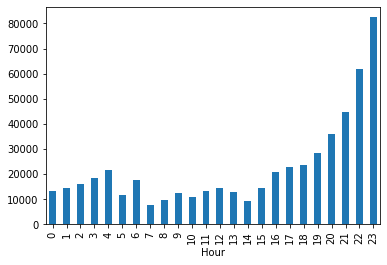

In [27]:
data_session.groupby('Hour')['SessionTime'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

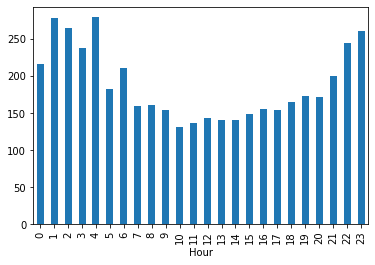

In [28]:
data_session.groupby('Hour')['SessionTime'].median().plot.bar()

#### 6. KMID는 user ID를 나타낸다. 총 몇 명의 패널에 대한 자료인가? 중복을 제외한 KMID의 리스트를 생성하시오. 총 몇 명의 user 가 있는가?

In [31]:
kmid_list=data.KMID.unique()

In [32]:
len(kmid_list)

2092

#### 7. 첫 번째 KMID에 해당하는 user의 데이터를 추출하시오. 해당 유저의 일간 Session 횟수를 bar plot으로 그리시오. 해당 유저의 일간 Session Time의 총계를 bar plot으로 그리시오. 

In [33]:
kmid_list[0]

'KM00002'

In [33]:
data_ind=data_session[data_session['KMID']=='KM00002'].set_index('Time Stamp')

<AxesSubplot:xlabel='Time Stamp'>

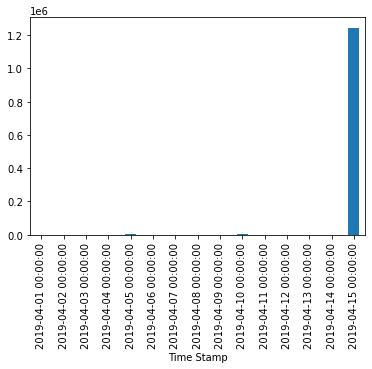

In [34]:
data_ind.resample('d').SessionTime.sum().plot.bar()
#4월15일이 모두 이상치를 가지고 있다.

In [37]:
data_ind.loc['2019-04-15']

,KMID,URL,Full Title,Weekday,Hour,NewSession,SessionTime
Time Stamp,,,,,,,
2019-04-15 15:44:22,KM00002,https://m.search.naver.com/search.naver?sm=mtp...,롯데온 하프타임 : 네이버 통합검색,0,15,True,1245908.0


<AxesSubplot:xlabel='Time Stamp'>

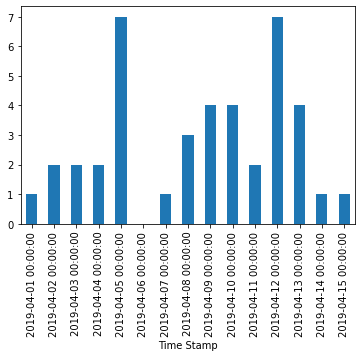

In [36]:
data_ind.resample('d').size().plot.bar()

#### 8. 위의 user의 session time의 총계가 두번째로 컸던 날짜의 session data를 추출해서 어떤 웹사이트에서 주로 시간을 보냈는지 확인하시오.

In [63]:
data_ind.resample('d').SessionTime.sum().sort_values(ascending=False).reset_index().loc[1,'Time Stamp']

Timestamp('2019-04-05 00:00:00')

In [69]:
data_ind['2019-04-05'].groupby('Full Title').SessionTime.sum().sort_values(ascending=False).reset_index().loc[0,'Full Title']

<ipython-input-69-0ddfa322f7ef>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_ind['2019-04-05'].groupby('Full Title').SessionTime.sum().sort_values(ascending=False).reset_index().loc[0,'Full Title']


'파파고 : 네이버 통합검색'